### Titanic dataset
Попробую разобрать датасет титаника с kaggle


В основу ноутбука взяты уроки ИАДа НИУ ВШЭ


https://github.com/hse-ds/iad-intro-ds/tree/master/2022


## -----


##### Импорт данных

Импортируем необходимые библиотеки

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline


Populating the interactive namespace from numpy and matplotlib


Импортируем данные

Берем их из ВШЭ тк они там немного изменены для тренировки

In [40]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

##### Обзор данных

Посмотрим на размер данных

In [41]:
Data.shape

(891, 12)

Посмотрим на несколько значений из таблицы

In [42]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
Data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,Dooley; Mr. Patrick,male,32.0,0,0,370376,7.75,NaN,Q


Посмотрим на основные характеристики данных

In [44]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Обработка признаков

С нечисловыми признаками очень не удобно работать, обработаем их и посмотрим , что можно с ними делать>

###### Обработаем признак "Sex"

In [46]:
Data.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [47]:
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Тут есть 5 неопределенных значений, тк это маленькая доля от всего числа данных, выкенем строки с этим значением

In [48]:
Data[Data.Sex == "unknown"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


Тут конечно можно определить пол, по имени, но для простоты выкинем строки

In [49]:
Data = Data[Data.Sex != "unknown"]
Data.shape

(886, 12)

In [50]:
Data.Sex.value_counts()

male      574
female    312
Name: Sex, dtype: int64

Давайте закодируем переменную Sex, чтобы с ней было удобней работать

In [51]:
Data.Sex = Data.Sex.apply(lambda x : 1 if x == 'female' else 0)

In [52]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


In [38]:
Data.Sex.value_counts()

male      574
female    312
Name: Sex, dtype: int64

----


Давайте теперь посмотрим, как пол влияет на выживаемость

Text(0.5, 1.0, 'Sex - Survived')

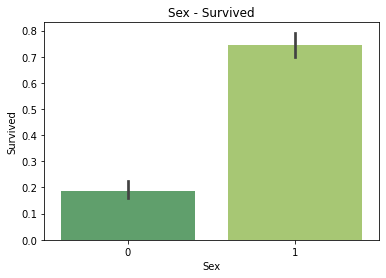

In [58]:
sns.barplot(x = 'Sex', y = 'Survived', data = Data, palette = 'summer')
plt.title('Sex - Survived')


Давайте попробуем построить этот же график в matplotlib

Text(0, 0.5, 'Survived')

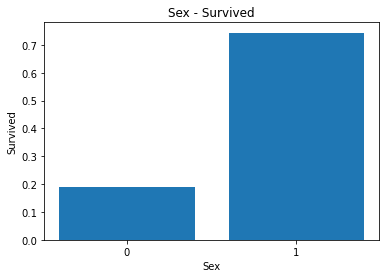

In [64]:
plt.bar([0, 1], [Data.Survived[Data.Sex == 0].mean(), Data.Survived[Data.Sex == 1].mean()])
plt.xticks([0, 1])
plt.title('Sex - Survived')
plt.xlabel('Sex')
plt.ylabel('Survived')

Теперь тоже самое , но не среднее , а количество и попробуем другим способом задать x (male, female)

Text(0, 0.5, 'Survived')

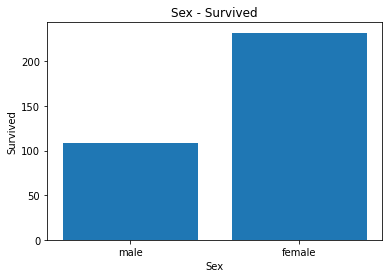

In [67]:
plt.bar(['male', 'female'], [Data.Survived[Data.Sex == 0].sum(), Data.Survived[Data.Sex == 1].sum()])
plt.title('Sex - Survived')
plt.xlabel('Sex')
plt.ylabel('Survived')